In [4]:
# ## install finrl library
!pip install git+https://github.com/AI4Finance-LLC/FinRL-Library.git

  Cloning https://github.com/AI4Finance-LLC/FinRL-Library.git to /tmp/pip-req-build-afe9qsdh
  Running command git clone -q https://github.com/AI4Finance-LLC/FinRL-Library.git /tmp/pip-req-build-afe9qsdh
  Cloning https://github.com/quantopian/pyfolio.git to /tmp/pip-install-ifxva4w9/pyfolio_eec9e42504794453a101222fd0919d55
  Running command git clone -q https://github.com/quantopian/pyfolio.git /tmp/pip-install-ifxva4w9/pyfolio_eec9e42504794453a101222fd0919d55
  Cloning https://github.com/AI4Finance-Foundation/ElegantRL.git to /tmp/pip-install-ifxva4w9/elegantrl_cb3887764eff4c29bbe7454a5f2f0108
  Running command git clone -q https://github.com/AI4Finance-Foundation/ElegantRL.git /tmp/pip-install-ifxva4w9/elegantrl_cb3887764eff4c29bbe7454a5f2f0108
     |████████████████████████████████| 73 kB 1.9 MB/s 
     |████████████████████████████████| 174 kB 42.7 MB/s 
     |████████████████████████████████| 57.6 MB 1.4 MB/s 
     |████████████████████████████████| 1.8 MB 36.5 MB/s 
     |██████

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
import datetime
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline

In [7]:
df_a2c=pd.read_csv('a2c_account.csv')
df_ppo=pd.read_csv('ppo_account.csv')
df_ddpg=pd.read_csv('ddpg_account.csv')
df_random=pd.read_csv('random_account.csv')
df_ensemble=pd.read_csv('ensemble_account.csv')

# Comparativa modelos

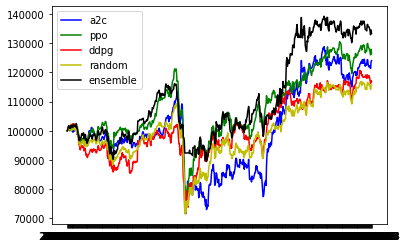

In [ ]:
%matplotlib inline
plt.plot_date(df_a2c.date, df_a2c.account_value,'b-',label='a2c')
plt.plot_date(df_ppo.date, df_ppo.account_value,'g-',label='ppo')
plt.plot_date(df_ddpg.date, df_ddpg.account_value,'r-',label='ddpg')
plt.plot_date(df_random.date, df_random.account_value,'y-',label='random')
plt.plot_date(df_ensemble.date, df_ensemble.account_value,'k-',label='ensemble')
plt.locator_params(axis="x", nbins=4)
plt.legend(loc="upper left")

**Modelo A - Random**

In [ ]:
print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_random)
perf_stats_all = pd.DataFrame(perf_stats_all)

==============Get Backtest Results===========
Annual return          0.059791
Cumulative returns     0.156247
Annual volatility      0.208175
Sharpe ratio           0.385816
Calmar ratio           0.173135
Stability              0.373224
Max drawdown          -0.345344
Omega ratio            1.078331
Sortino ratio          0.503329
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.027047
Daily value at risk   -0.025909
dtype: float64


==============Compare to IBEX===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (628, 8)


Start date,2019-04-01
End date,2021-09-14
Total months,30
,Backtest
Annual return,5.979%
Cumulative returns,15.625%
Annual volatility,20.817%
Sharpe ratio,0.39
Calmar ratio,0.17
Stability,0.37
Max drawdown,-34.534%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,34.53,2020-02-17,2020-03-12,2021-02-19,265
1,12.23,2019-04-05,2019-08-15,2019-12-19,185
2,6.38,2021-05-07,2021-07-19,2021-08-13,71
3,4.30,2021-03-01,2021-03-05,2021-03-12,10
4,2.62,2020-01-17,2020-01-27,2020-02-04,13


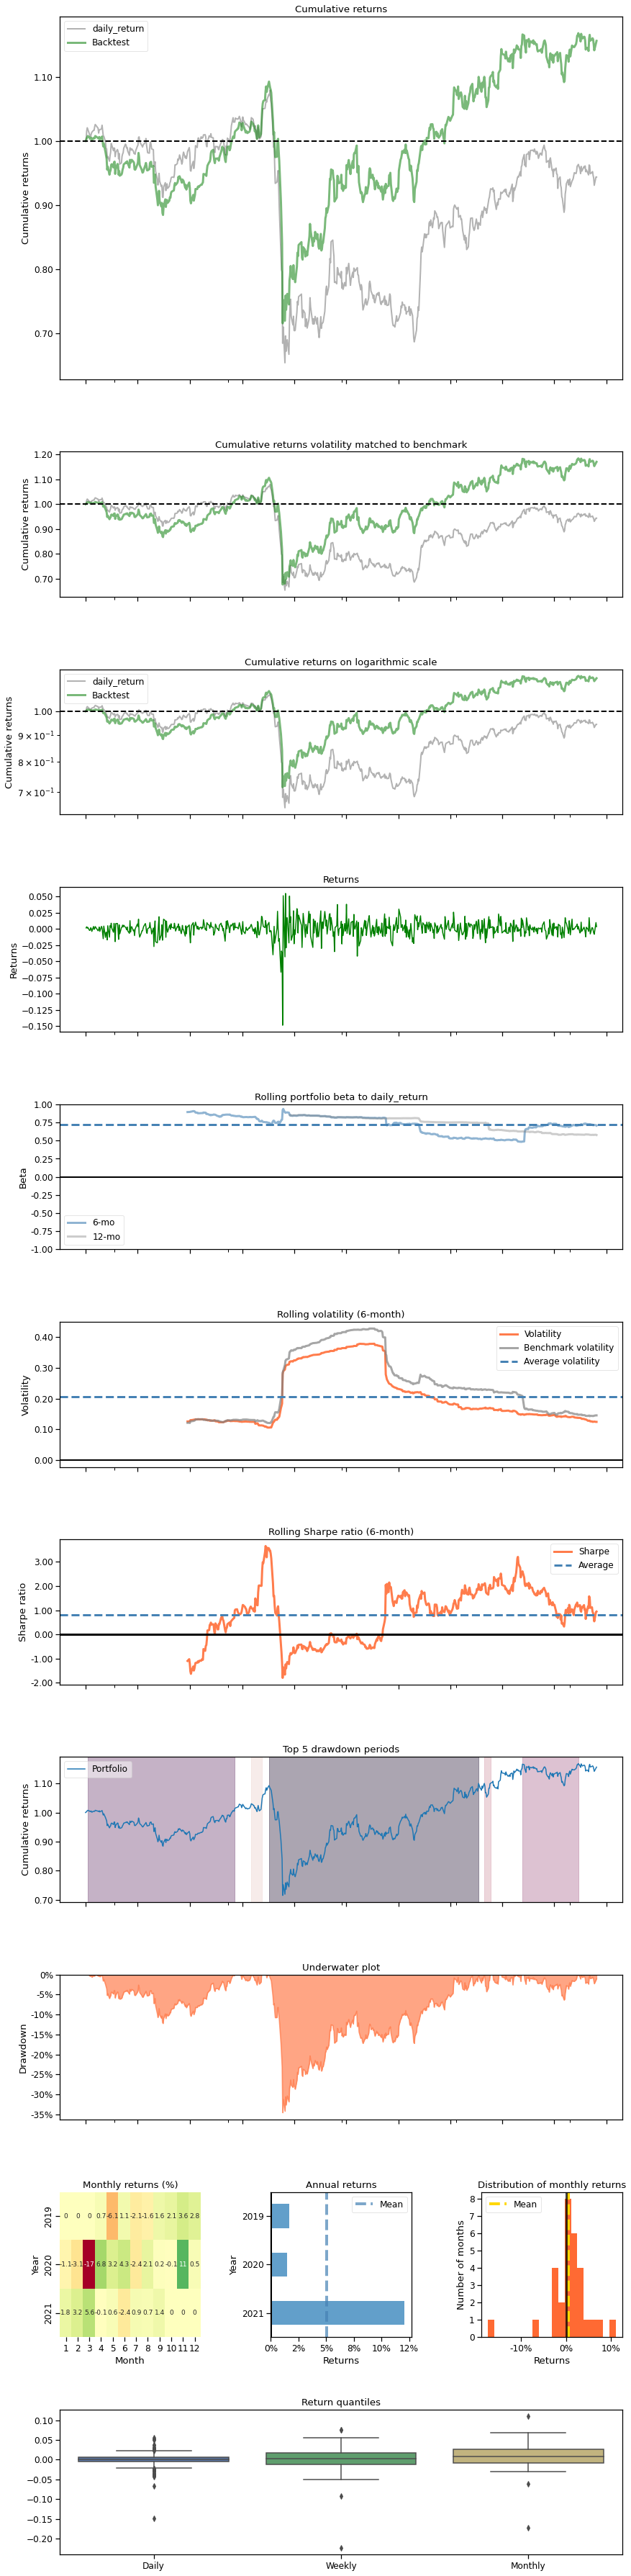

In [ ]:
print("==============Compare to IBEX===========")
%matplotlib inline
backtest_plot(df_random, 
             baseline_ticker = '^IBEX', 
             baseline_start = df_random.loc[0,'date'],
             baseline_end = df_random.loc[len(df_random)-1,'date'])

**Modelo B - A2C**

In [ ]:
print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_a2c)
perf_stats_all = pd.DataFrame(perf_stats_all)

==============Get Backtest Results===========
Annual return          0.089737
Cumulative returns     0.239666
Annual volatility      0.277229
Sharpe ratio           0.451361
Calmar ratio           0.243941
Stability              0.260522
Max drawdown          -0.367866
Omega ratio            1.093419
Sortino ratio          0.608617
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.970232
Daily value at risk   -0.034431
dtype: float64


==============Compare to IBEX===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (628, 8)


Start date,2019-04-01
End date,2021-09-14
Total months,30
,Backtest
Annual return,8.974%
Cumulative returns,23.967%
Annual volatility,27.723%
Sharpe ratio,0.45
Calmar ratio,0.24
Stability,0.26
Max drawdown,-36.787%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,36.79,2020-02-19,2020-03-16,2021-01-08,233
1,10.68,2021-04-29,2021-07-19,NaT,NaN
2,9.31,2019-04-10,2019-08-06,2020-01-15,201
3,6.36,2021-02-19,2021-03-05,2021-03-30,28
4,4.56,2021-01-26,2021-01-29,2021-02-08,10


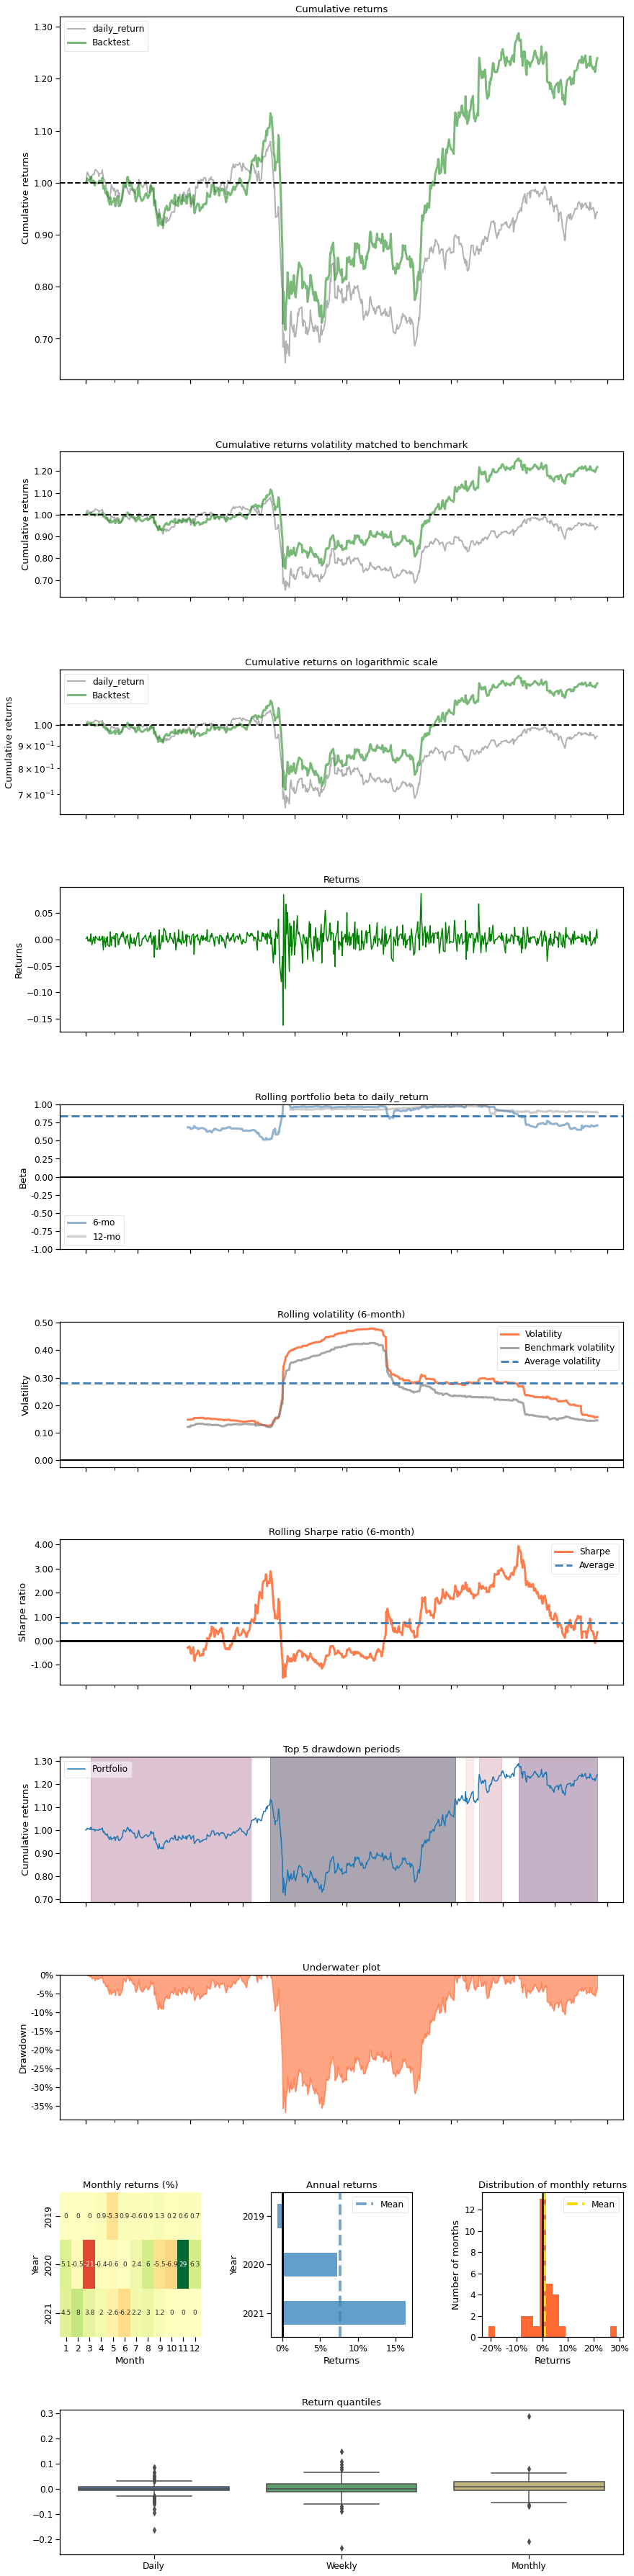

In [ ]:
print("==============Compare to IBEX===========")
%matplotlib inline
backtest_plot(df_a2c, 
             baseline_ticker = '^IBEX', 
             baseline_start = df_a2c.loc[0,'date'],
             baseline_end = df_a2c.loc[len(df_a2c)-1,'date'])

**Modelo C - DDPG**

==============Compare to IBEX===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (628, 8)


Start date,2019-04-01
End date,2021-09-14
Total months,30
,Backtest
Annual return,6.439%
Cumulative returns,16.884%
Annual volatility,20.579%
Sharpe ratio,0.41
Calmar ratio,0.23
Stability,0.57
Max drawdown,-28.165%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,28.17,2019-04-16,2020-03-12,2020-08-11,346
1,11.74,2020-08-12,2020-10-28,2020-11-13,68
2,6.20,2021-06-25,2021-07-19,2021-08-02,27
3,5.74,2021-01-14,2021-02-23,2021-03-30,54
4,3.79,2021-05-10,2021-06-18,2021-06-25,35


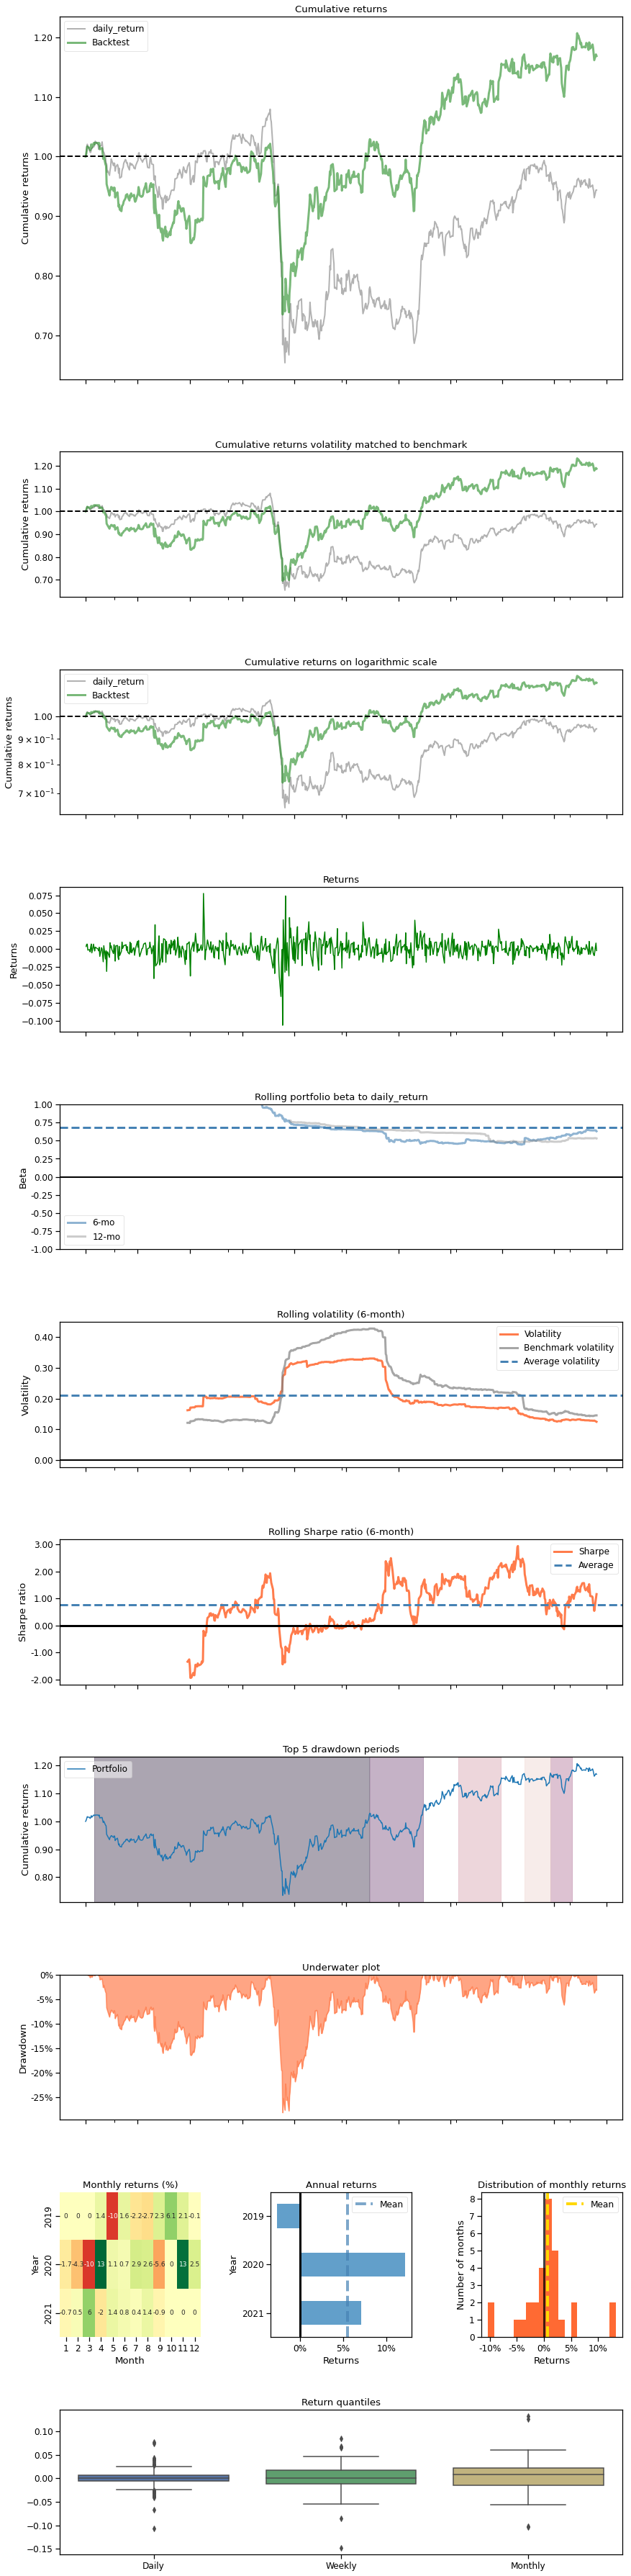

In [ ]:
print("==============Compare to IBEX===========")
%matplotlib inline
backtest_plot(df_ddpg, 
             baseline_ticker = '^IBEX', 
             baseline_start = df_ddpg.loc[0,'date'],
             baseline_end = df_ddpg.loc[len(df_ddpg)-1,'date'])

**Modelo D - PPO**

==============Compare to IBEX===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (628, 8)


Start date,2019-04-01
End date,2021-09-14
Total months,30
,Backtest
Annual return,9.837%
Cumulative returns,26.436%
Annual volatility,21.639%
Sharpe ratio,0.54
Calmar ratio,0.26
Stability,0.54
Max drawdown,-37.948%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,37.95,2020-02-17,2020-03-16,2021-03-12,280
1,8.84,2019-07-24,2019-08-15,2019-12-06,98
2,8.39,2021-06-14,2021-07-19,NaT,NaN
3,7.27,2019-04-30,2019-05-13,2019-07-16,56
4,2.88,2021-05-10,2021-05-13,2021-06-11,25


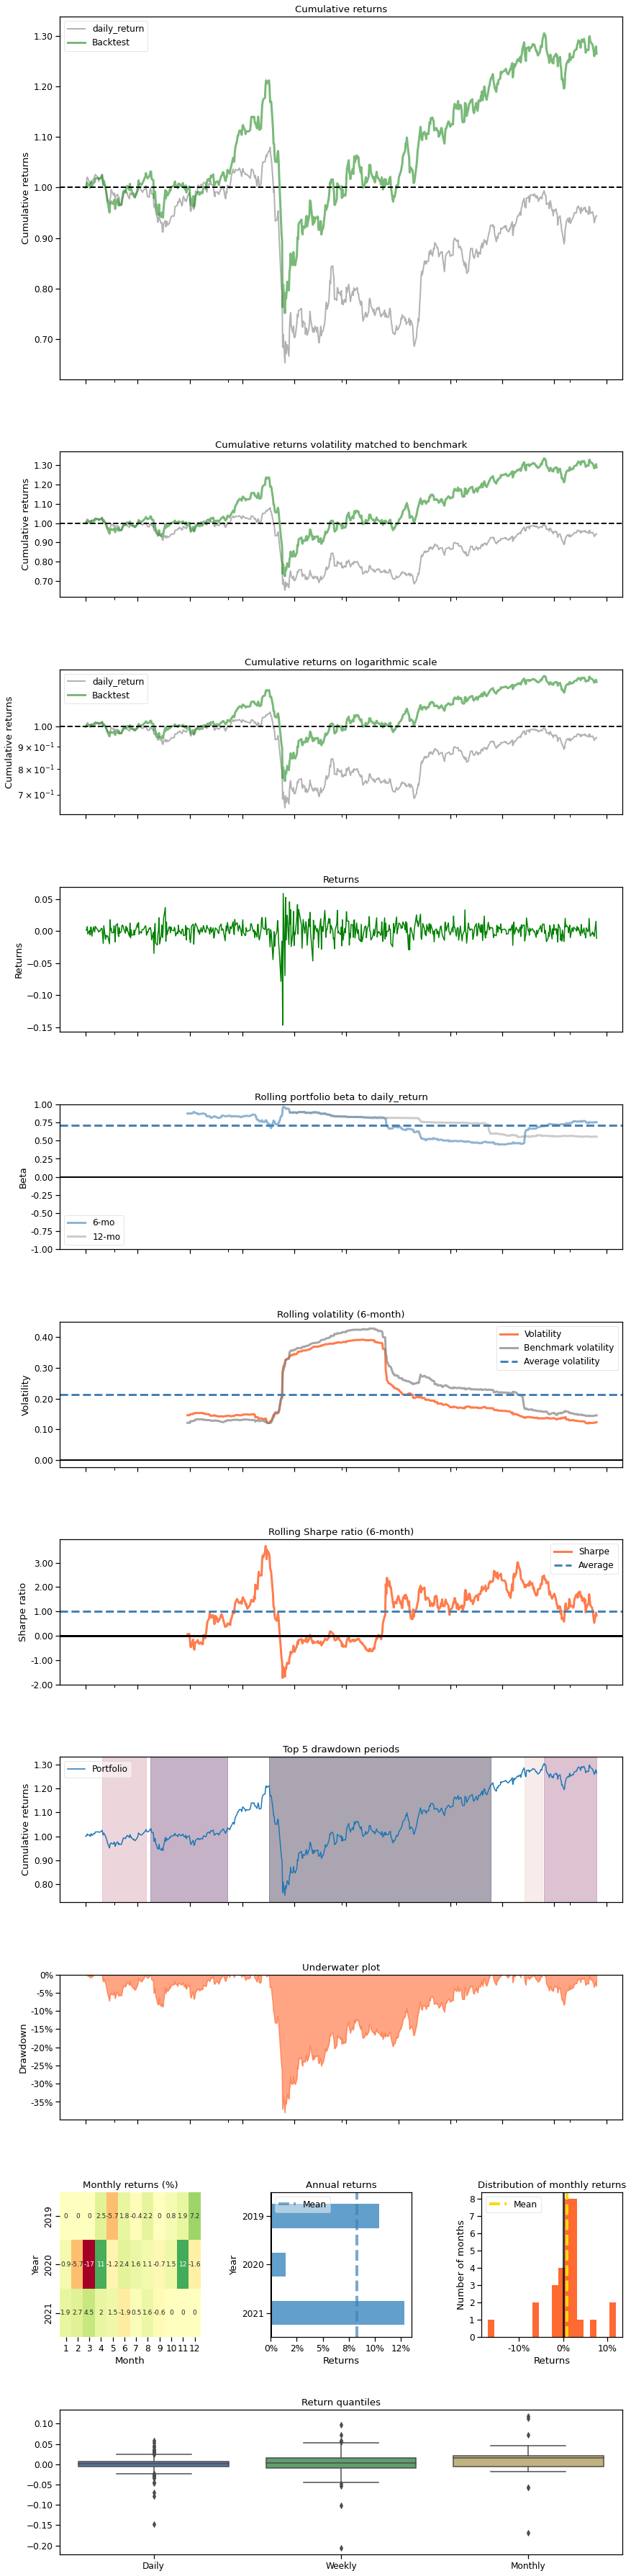

In [ ]:
print("==============Compare to IBEX===========")
%matplotlib inline
backtest_plot(df_ppo, 
             baseline_ticker = '^IBEX', 
             baseline_start = df_ppo.loc[0,'date'],
             baseline_end = df_ppo.loc[len(df_ppo)-1,'date'])

**Modelo E - Ensemble**

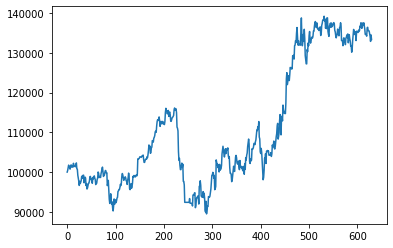

In [ ]:
df_ensemble.account_value.plot()

In [ ]:
print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_ensemble)
perf_stats_all = pd.DataFrame(perf_stats_all)

==============Get Backtest Results===========
Annual return          0.122007
Cumulative returns     0.333486
Annual volatility      0.196118
Sharpe ratio           0.685928
Calmar ratio           0.531838
Stability              0.641886
Max drawdown          -0.229406
Omega ratio            1.133000
Sortino ratio          0.987251
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.979335
Daily value at risk   -0.024175
dtype: float64


==============Compare to IBEX===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (628, 8)


Start date,2019-04-01
End date,2021-09-14
Total months,30
,Backtest
Annual return,12.201%
Cumulative returns,33.349%
Annual volatility,19.612%
Sharpe ratio,0.69
Calmar ratio,0.53
Stability,0.64
Max drawdown,-22.941%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,22.94,2020-02-12,2020-05-19,2020-12-28,229
1,11.81,2019-04-30,2019-08-15,2019-10-25,129
2,8.33,2021-02-19,2021-03-08,2021-04-29,50
3,6.50,2021-04-29,2021-07-19,NaT,NaN
4,3.25,2021-02-08,2021-02-17,2021-02-19,10


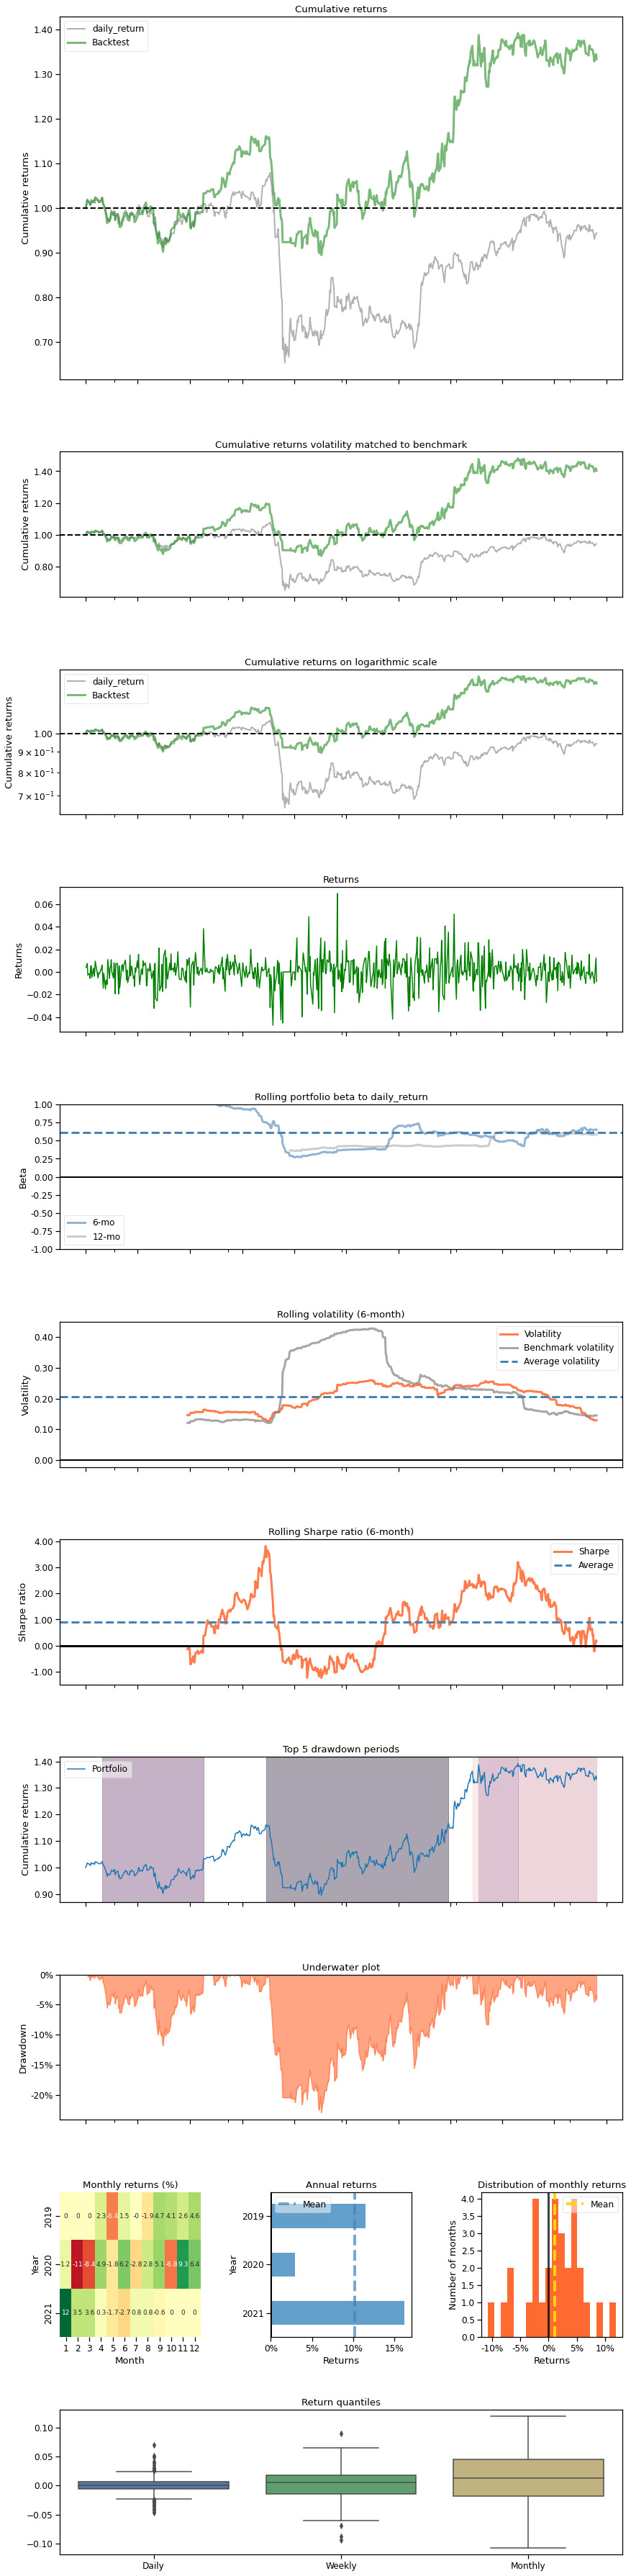

In [ ]:
print("==============Compare to IBEX===========")
%matplotlib inline
backtest_plot(df_ensemble, 
             baseline_ticker = '^IBEX', 
             baseline_start = df_ensemble.loc[0,'date'],
             baseline_end = df_ensemble.loc[len(df_ensemble)-1,'date'])

**TOTAL PROFIT**

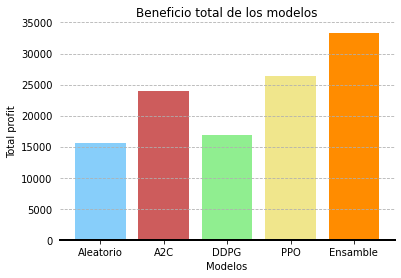

In [23]:
#import matplotlib.pyplot as plt
 
## Declaramos valores para el eje x
eje_x = ['Aleatorio', 'A2C', 'DDPG', 'PPO','Ensamble']
 
## Declaramos valores para el eje y
eje_y = [df_random.loc[len(df_random)-1,'account_value']-100000,df_a2c.loc[len(df_a2c)-1,'account_value']-100000,df_ddpg.loc[len(df_ddpg)-1,'account_value']-100000,df_ppo.loc[len(df_ppo)-1,'account_value']-100000,df_ensemble.loc[len(df_ensemble)-1,'account_value']-100000]
 
## Creamos Gráfica
plt.bar(eje_x, eje_y,color=['lightskyblue','indianred','lightgreen','khaki','darkorange'],edgecolor='none')
 
## Legenda en el eje y
plt.ylabel('Total profit')
 
## Legenda en el eje x
plt.xlabel('Modelos')
## 
plt.title('Beneficio total de los modelos')
ax = plt.axes()

#ax.set_axis_bgcolor('gold')



ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('none')

ax.yaxis.grid(True, which='major',linestyle='dashed')    
## Mostramos Gráfica
plt.show()